In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Create a random cloud of points in [-1, 1] x [-1, 1]
num_points = 1000  # You can adjust the number of points
P = np.random.uniform(low=-1, high=1, size=(2, num_points))

print(f"Created a cloud of {num_points} random points in [-1, 1] x [-1, 1].")
print("Shape of P:", P.shape)

Created a cloud of 1000 random points in [-1, 1] x [-1, 1].
Shape of P: (2, 1000)


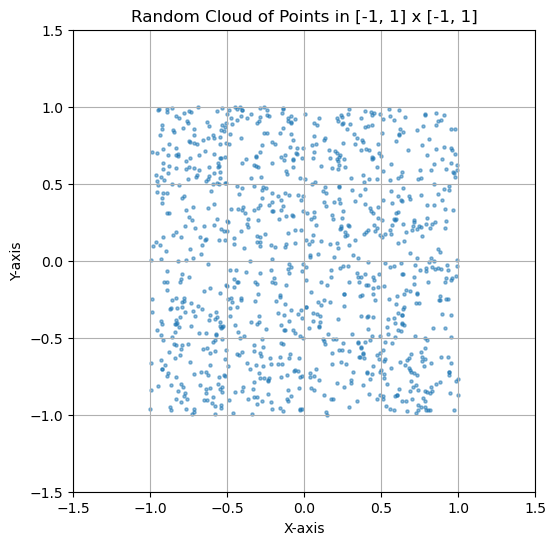

In [16]:
# Scatter plot the random cloud of points P
plt.figure(figsize=(6, 6))
plt.scatter(P[0, :], P[1, :], s=5, alpha=0.5)
plt.title('Random Cloud of Points in [-1, 1] x [-1, 1]')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

In [17]:
import numpy as np
import math

def rotation_matrix_2d(angle_degrees, clockwise=True):
  """
  Returns a 2D rotation matrix for a given angle in degrees.

  Args:
    angle_degrees: The angle of rotation in degrees.
    clockwise: If True, the rotation is clockwise. If False, it's counter-clockwise.

  Returns:
    A 2x2 NumPy array representing the rotation matrix.
  """
  angle_radians = math.radians(angle_degrees)
  if clockwise:
    angle_radians = -angle_radians  # Clockwise rotation

  cos_theta = np.cos(angle_radians)
  sin_theta = np.sin(angle_radians)

  rotation_matrix = np.array([[cos_theta, -sin_theta],
                              [sin_theta, cos_theta]])
  return rotation_matrix

In [18]:
A = rotation_matrix_2d(50, clockwise=False) @ np.diag([4,2]) @ rotation_matrix_2d(10, clockwise=False).T
U, S, V_transpose = np.linalg.svd(A)
S = np.diag(S)

In [19]:
print(np.round(U,2))
print(np.round(S,2))
print(np.round(V_transpose,2))
print(np.round(A,2))

[[-0.64 -0.77]
 [-0.77  0.64]]
[[4. 0.]
 [0. 2.]]
[[-0.98 -0.17]
 [-0.17  0.98]]
[[ 2.8  -1.06]
 [ 2.79  1.8 ]]


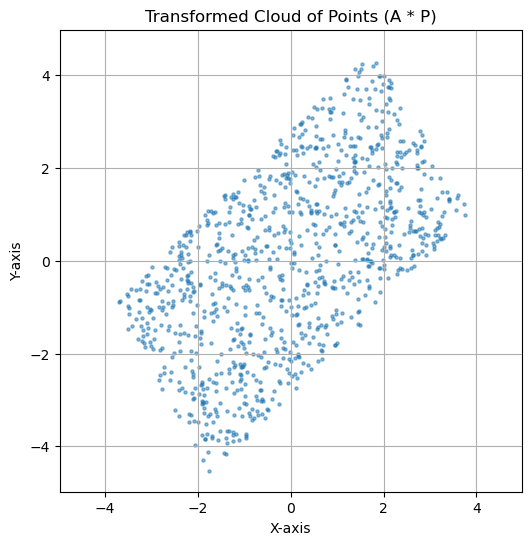

In [20]:
# Compute A * P
P_transformed = A @ P

# Scatter plot the transformed points
plt.figure(figsize=(6, 6))
plt.scatter(P_transformed[0, :], P_transformed[1, :], s=5, alpha=0.5)
plt.title('Transformed Cloud of Points (A * P)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
# Adjust plot limits based on the transformed points to ensure they are visible
max_x = np.max(np.abs(P_transformed[0, :]))
max_y = np.max(np.abs(P_transformed[1, :]))
max_val = max(max_x, max_y, 1) * 1.1 # Add a little padding
plt.xlim([-max_val, max_val])
plt.ylim([-max_val, max_val])
plt.show()

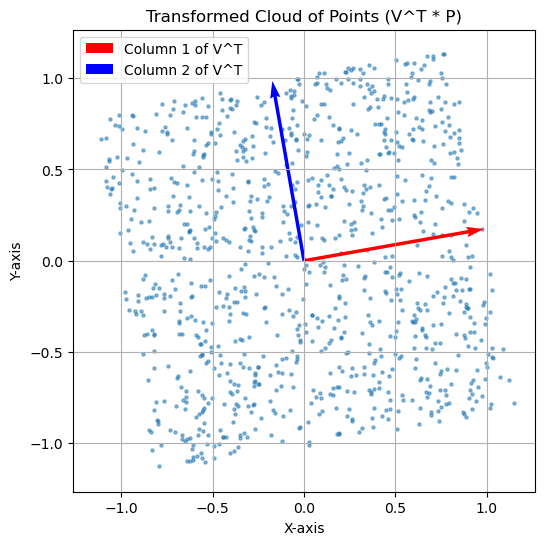

In [21]:
# Compute V^T * P
P_transformed_VT = V_transpose @ P

# Scatter plot the transformed points
plt.figure(figsize=(6, 6))
plt.scatter(P_transformed_VT[0, :], P_transformed_VT[1, :], s=5, alpha=0.5)
plt.title('Transformed Cloud of Points (V^T * P)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Adjust plot limits based on the transformed points
max_x_vt = np.max(np.abs(P_transformed_VT[0, :]))
max_y_vt = np.max(np.abs(P_transformed_VT[1, :]))
max_val_vt = max(max_x_vt, max_y_vt, 1) * 1.1 # Add a little padding
plt.xlim([-max_val_vt, max_val_vt])
plt.ylim([-max_val_vt, max_val_vt])


# Add the columns of V as vectors to the plot
col1_A = -V_transpose[:, 0]
col2_A = V_transpose[:, 1]
plt.quiver(0, 0, col1_A[0], col1_A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Column 1 of V^T')
plt.quiver(0, 0, col2_A[0], col2_A[1], angles='xy', scale_units='xy', scale=1, color='b', label='Column 2 of V^T')
plt.legend()

plt.show()

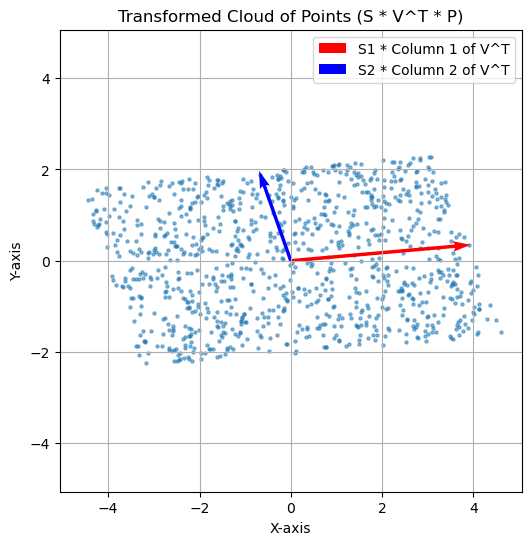

In [22]:
# Compute S * V^T * P
P_transformed_SVT = S @ V_transpose @ P

# Scatter plot the transformed points
plt.figure(figsize=(6, 6))
plt.scatter(P_transformed_SVT[0, :], P_transformed_SVT[1, :], s=5, alpha=0.5)
plt.title('Transformed Cloud of Points (S * V^T * P)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Adjust plot limits based on the transformed points
max_x_vt = np.max(np.abs(P_transformed_SVT[0, :]))
max_y_vt = np.max(np.abs(P_transformed_SVT[1, :]))
max_val_vt = max(max_x_vt, max_y_vt, 1) * 1.1 # Add a little padding
plt.xlim([-max_val_vt, max_val_vt])
plt.ylim([-max_val_vt, max_val_vt])

# Add the columns of S VT as vectors to the plot
col1_A = -(S@V_transpose)[:, 0]
col2_A = (S@V_transpose)[:, 1]
plt.quiver(0, 0, col1_A[0], col1_A[1], angles='xy', scale_units='xy', scale=1, color='r', label='S1 * Column 1 of V^T')
plt.quiver(0, 0, col2_A[0], col2_A[1], angles='xy', scale_units='xy', scale=1, color='b', label='S2 * Column 2 of V^T')
plt.legend()

plt.show()

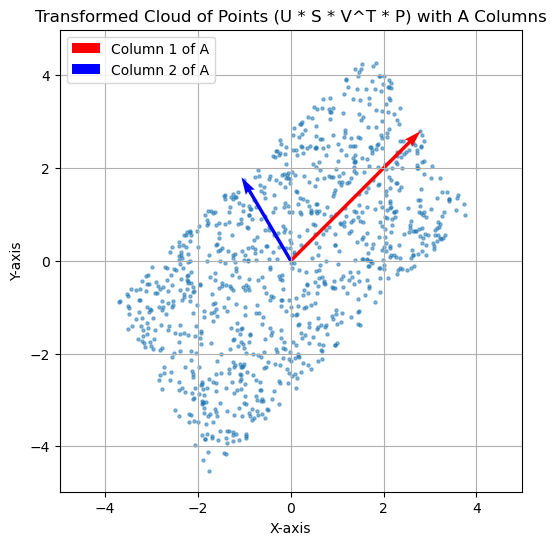

In [24]:
# Calculate the matrix product of U and P_transformed_SVT
P_transformed_USVT = U @ P_transformed_SVT

# Create a scatter plot of the transformed points
plt.figure(figsize=(6, 6))
plt.scatter(P_transformed_USVT[0, :], P_transformed_USVT[1, :], s=5, alpha=0.5)

# Set the title and labels
plt.title('Transformed Cloud of Points (U * S * V^T * P) with A Columns')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a grid
plt.grid(True)

# Set the aspect ratio to equal
plt.gca().set_aspect('equal', adjustable='box')

# Adjust plot limits dynamically
max_x = np.max(np.abs(P_transformed_USVT[0, :]))
max_y = np.max(np.abs(P_transformed_USVT[1, :]))
# Also consider the magnitude of the vectors from A for plot limits
max_a = np.max(np.abs(A))
max_val = max(max_x, max_y, max_a, 1) * 1.1 # Add a little padding

plt.xlim([-max_val, max_val])
plt.ylim([-max_val, max_val])

# Add the columns of A as vectors to the plot
col1_A = A[:,0]
col2_A = A[:,1]
plt.quiver(0, 0, col1_A[0], col1_A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Column 1 of A')
plt.quiver(0, 0, col2_A[0], col2_A[1], angles='xy', scale_units='xy', scale=1, color='b', label='Column 2 of A')
plt.legend()


# Display the plot
plt.show()

## Task

Read the above code and look at the output results. Describe geometrically/mathematically what the result is when the cloud of points P are multiplied by

* A
* V^T
* S V^T (what does the S step add to the previous transformation)
* U S V^T (what does the U step add)